In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.ticker as mticker
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/kurukshetra/anaconda3/envs/flow/lib/python3.7/site-packages/ipykernel_launcher.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 640x480 with 0 Axes>

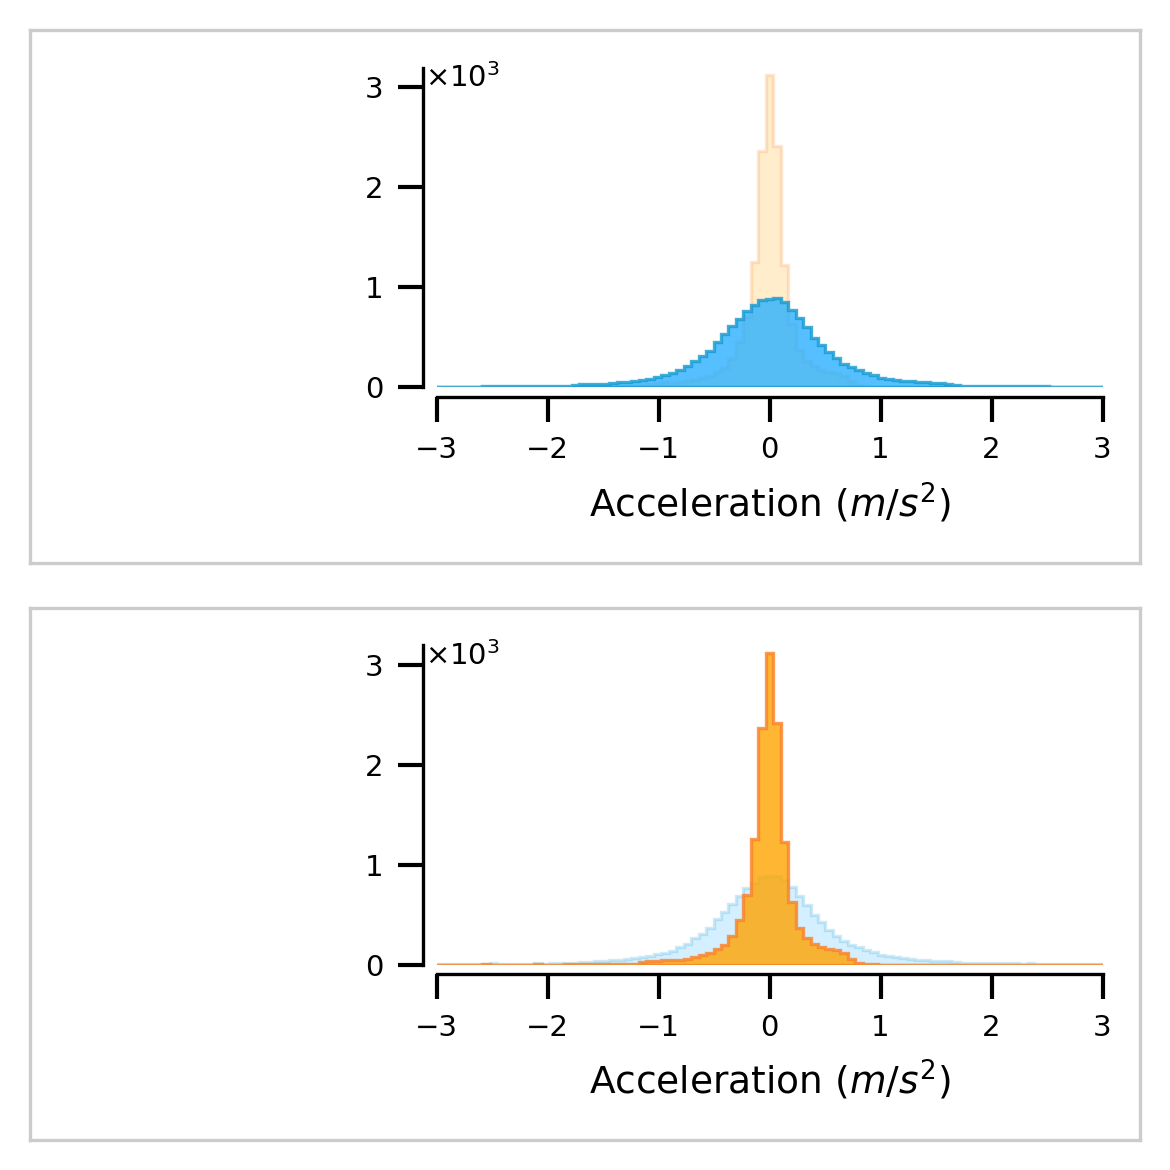

In [7]:
# Load the processed data (which is small enough to be uploaded to GitHub as well)
data_real = pd.read_csv('./Data/i_24/final_i24.csv') 
directory = './Data/Typical_IDM_data/'

files = os.listdir(directory)
file_directories = [] 
for i in files:
    file_directories.append(directory + i)

def get_realized_accel(data, start_time, end_time):
    # get all unique vehicle ids
    vehicle_ids = data['id'].unique()

    # get all idm vehicles, if the id has human 
    idm_vehicles = [id for id in vehicle_ids if 'idm' in id]

    all_vehicle_data = []
    # get all idm vehicles acceleration data before shock time
    for veh in idm_vehicles:
        veh_data = data[data['id'] == veh]
        # Include both start and end time
        veh_data = veh_data[(veh_data['time'] >= start_time) & (veh_data['time'] <= end_time)]
        #veh_data = veh_data[veh_data['time'] > start_time]
        # just get realized_accel 
        veh_data = veh_data['target_accel_with_noise_no_failsafe']
        all_vehicle_data.append(veh_data)
    return all_vehicle_data

all_data_idm = []
for j in file_directories:
    data = get_realized_accel(pd.read_csv(j), 80, 160)
    for k in data:
        all_data_idm.extend(k)

all_data_idm_sampled = all_data_idm

image_paths = ['./real_i24_enhanced.jpg', './real_i24_enhanced.jpg']
logos_path = ['./i24_logo.png', './sumo_logo.png']

plt.rcParams["text.color"] = 'black'
sns.set_style("whitegrid", {"grid.linestyle": ""})
fs = 11

plt.subplots_adjust(right=0.5)
fig, ax = plt.subplots(2, 1, figsize=(4, 4), dpi=300)
fig.subplots_adjust(right=2.85)  # Add padding of 15% of the plot width to the right

plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)

n_bins = 1000 # Number of equal width bins in the range
n_bins_2 = np.linspace(-4, 4, 120)

for i in range(2):

    #ax[i].legend(fontsize = fs-2, loc='upper right') 
    #image = Image.open(image_paths[i])
    #ax[i].imshow(image)
    
    #image_logo = Image.open(logos_path[i]).convert("RGBA")

    # logo should be displayed bottom left
    # ax_logo = inset_axes(ax[i], width="14%", height="28%", loc='lower left')
    # ax_logo.imshow(image_logo, aspect='auto', zorder=1)
    # ax_logo.spines['right'].set_color('none')
    # ax_logo.spines['top'].set_color('none')
    # ax_logo.spines['left'].set_color('none')
    # ax_logo.spines['bottom'].set_color('none')
    # ax_logo.set_xticklabels([])
    # ax_logo.set_yticklabels([])

    ax_hist = inset_axes(ax[i], width="60%", height="60%", loc='upper right', borderpad=0.9)
    ax_hist.set_xlim(-3., 3.0)
    ax_hist.set_ylim(0, 3.20)
    ax_hist.set_yticks([0, 1, 2, 3])

    ax_hist.set_xticks([-3, -2, -1, 0, 1, 2, 3] )
    ax_hist.set_xlabel("Acceleration $(m/s^{2})$", fontsize = fs-2, color='black', labelpad=4)
    # ax[i].set_ylabel("Frequency", fontsize = fs)

    # formatter = mticker.ScalarFormatter(useMathText=True)
    # formatter.set_powerlimits((-3, 3))
    # formatter.set_scientific(True)
    # ax[i].yaxis.set_major_formatter(formatter)
    # After the plotting code and before plt.show()
    ax_hist.text(-3.1, 3.0, r'$\times10^{3}$', fontsize=fs-4, color='black')

    # Customize the x-axis to look like an inverted U
    ax_hist.spines['right'].set_color('none')
    ax_hist.spines['top'].set_color('none')
    
    ax_hist.spines['left'].set_color('black')
    ax_hist.spines['left'].set_position(('axes', -0.02))
    ax_hist.yaxis.set_ticks_position('left')
    ax_hist.tick_params(axis='y', colors='black', direction='out', length=6, width=1, labelsize=fs-4) #length of the ticks

    ax_hist.xaxis.set_ticks_position('bottom')
    ax_hist.spines['bottom'].set_color('black')
    ax_hist.spines['bottom'].set_position(('data', 0))  # Position the spine in the middle of the plot

    # Lower the bottom spine (and thus the x-axis) slightly below the plot
    ax_hist.spines['bottom'].set_position(('axes', -0.03))
    ax_hist.xaxis.set_ticks_position('bottom')
    ax_hist.tick_params(axis='x', colors='black', direction='out', length=6, width=1, labelsize = fs-4) #length of the ticks
    ax_hist.patch.set_alpha(1.0)

    if i == 0:
        ax_hist.hist(data_real['acceleration'], bins=n_bins_2, facecolor = '#2ab0ff', alpha =0.80, edgecolor='#169acf', linewidth=0.8, label = "I-24 Motion", density=True, histtype="stepfilled", range=(-3, 3), zorder=2) # 2 makes it in front
        ax_hist.hist(all_data_idm_sampled, bins= n_bins_2, facecolor = '#FFA500', alpha =0.2, edgecolor='#FA8128', linewidth=0.8, label = "Simulated (SUMO)", density=True, histtype="stepfilled", range=(-3, 3), zorder=1)

    else: 
        ax_hist.hist(all_data_idm_sampled, bins= n_bins_2, facecolor = '#FFA500', alpha =0.80, edgecolor='#FA8128', linewidth=0.8, label = "Simulated (SUMO)", density=True, histtype="stepfilled", range=(-3, 3), zorder = 2) # The one in front needs to have smaller alpha
        ax_hist.hist(data_real['acceleration'], bins=n_bins_2, facecolor = '#2ab0ff', alpha =0.2, edgecolor='#169acf', linewidth=0.8, label = "I-24 Motion", density=True, histtype="stepfilled", range=(-3, 3), zorder = 1)
    
    # Remove x and y-axis labels for the histogram
    ax[i].set_xlabel("")  # Remove x-axis label
    ax[i].set_ylabel("")  # Remove y-axis label

    # To remove the tick labels entirely, you can use:
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

    # ax[i].spines['left'].set_color('black')
    # ax[i].spines['right'].set_color('black')
    # ax[i].spines['bottom'].set_color('black')
    # ax[i].spines['top'].set_color('black')
    ax[i].spines['bottom'].set_position(('axes', 0.0))

# Smooth using Seaborn
# sns.kdeplot(data_real['acceleration'], ax=ax[0], color='#2ab0ff', fill=False, label="I-24 Motion", bw_adjust=0.1)
# sns.kdeplot(all_data_idm_sampled, ax=ax[0], color='#FFA500', fill=False, label="Simulated (SUMO)", bw_adjust=0.1)

# sns.kdeplot(data_real['acceleration'], ax=ax[1], color='#2ab0ff', fill=False, label="I-24 Motion", bw_adjust=0.1)
# sns.kdeplot(all_data_idm_sampled, ax=ax[1], color='#FFA500', fill=False, label="Simulated (SUMO)", bw_adjust=0.1)

fig.tight_layout()
plt.savefig('./real_accel_new.pdf', format ='pdf', transparent=True)
plt.savefig('./real_accel_new_png.png', transparent=True)
plt.show()